# UCI Dodgers dataset

In [49]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from config import data_raw_folder, data_processed_folder
from timeeval import Datasets
import matplotlib.pyplot as plt

In [50]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [51]:
dataset_collection_name = "Dodgers"
source_folder = Path(data_raw_folder) / "UCI ML Repository/Dodgers"
target_folder = Path(data_processed_folder)

print(f"Looking for source datasets in {source_folder.absolute()} and\nsaving processed datasets in {target_folder.absolute()}")

Looking for source datasets in /home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/Dodgers and
saving processed datasets in /home/projects/akita/data/benchmark-data/data-processed


In [52]:
dataset_name = "101-freeway-traffic"
train_type = "unsupervised"
train_is_normal = False
input_type = "univariate"
datetime_index = True
dataset_type = "real"

# create target directory
dataset_subfolder = Path(input_type) / dataset_collection_name
target_subfolder = target_folder / dataset_subfolder
try:
    os.makedirs(target_subfolder)
    print(f"Created directories {target_subfolder}")
except FileExistsError:
    print(f"Directories {target_subfolder} already exist")
    pass

dm = Datasets(target_folder)

Directories /home/projects/akita/data/benchmark-data/data-processed/univariate/Dodgers already exist


In [53]:
data_file = source_folder / "Dodgers.data"
events_file = source_folder / "Dodgers.events"

# transform data
df = pd.read_csv(data_file, header=None, encoding="latin1", parse_dates=[0], infer_datetime_format=True)
df.columns = ["timestamp", "count"]
#df["count"] = df["count"].replace(-1, np.nan)

# read and add labels
df_events = pd.read_csv(events_file, header=None, encoding="latin1")
df_events.columns = ["date", "begin", "end", "game attendance" ,"away team", "game score"]
df_events.insert(0, "begin_timestamp", pd.to_datetime(df_events["date"] + " " + df_events["begin"]))
df_events.insert(1, "end_timestamp", pd.to_datetime(df_events["date"] + " " + df_events["end"]))
df_events = df_events.drop(columns=["date", "begin", "end", "game attendance" ,"away team", "game score"])
# labelling
df["is_anomaly"] = 0
for _, (t1, t2) in df_events.iterrows():
    tmp = df[df["timestamp"] >= t1]
    tmp = tmp[tmp["timestamp"] <= t2]
    df.loc[tmp.index, "is_anomaly"] = 1
# mark missing values as anomaly as well
df.loc[df["count"] == -1, "is_anomaly"] = 1

filename = f"{dataset_name}.test.csv"
path = os.path.join(dataset_subfolder, filename)
target_filepath = os.path.join(target_subfolder, filename)
dataset_length = len(df)
df.to_csv(target_filepath, index=False)
print(f"Processed dataset {dataset_name} -> {target_filepath}")

# save metadata
dm.add_dataset((dataset_collection_name, dataset_name),
    train_path = None,
    test_path = path,
    dataset_type = dataset_type,
    datetime_index = datetime_index,
    split_at = None,
    train_type = train_type,
    train_is_normal = train_is_normal,
    input_type = input_type,
    dataset_length = dataset_length
)

dm.save()

Processed dataset 101-freeway-traffic -> /home/projects/akita/data/benchmark-data/data-processed/univariate/Dodgers/101-freeway-traffic.test.csv


In [54]:
dm.refresh()
dm.df().loc[(slice(dataset_collection_name,dataset_collection_name), slice(None))]

,,train_path,test_path,dataset_type,datetime_index,split_at,train_type,train_is_normal,input_type,length
collection_name,dataset_name,,,,,,,,,
Dodgers,101-freeway-traffic,NaN,univariate/Dodgers/101-freeway-traffic.test.csv,real,True,NaN,unsupervised,False,univariate,50400


## Experimentation

In [35]:
data_file = source_folder / "Dodgers.data"
df = pd.read_csv(data_file, header=None, encoding="latin1", parse_dates=[0], infer_datetime_format=True)
df.columns = ["timestamp", "count"]
#df["count"] = df["count"].replace(-1, np.nan)
df

,timestamp,count
0,2005-04-10 00:00:00,-1
1,2005-04-10 00:05:00,-1
2,2005-04-10 00:10:00,-1
3,2005-04-10 00:15:00,-1
4,2005-04-10 00:20:00,-1
...,...,...
50395,2005-10-01 23:35:00,-1
50396,2005-10-01 23:40:00,-1
50397,2005-10-01 23:45:00,-1
50398,2005-10-01 23:50:00,-1


In [36]:
events_file = source_folder / "Dodgers.events"
df_events = pd.read_csv(events_file, header=None, encoding="latin1")
df_events.columns = ["date", "begin", "end", "game attendance" ,"away team", "game score"]
df_events.insert(0, "begin_timestamp", pd.to_datetime(df_events["date"] + " " + df_events["begin"]))
df_events.insert(1, "end_timestamp", pd.to_datetime(df_events["date"] + " " + df_events["end"]))
df_events = df_events.drop(columns=["date", "begin", "end", "game attendance" ,"away team", "game score"])
df_events

,begin_timestamp,end_timestamp
0,2005-04-12 13:10:00,2005-04-12 16:23:00
1,2005-04-13 19:10:00,2005-04-13 21:48:00
2,2005-04-15 19:40:00,2005-04-15 21:48:00
3,2005-04-16 19:10:00,2005-04-16 21:52:00
4,2005-04-17 13:10:00,2005-04-17 15:31:00
...,...,...
76,2005-09-25 13:10:00,2005-09-25 16:06:00
77,2005-09-26 19:10:00,2005-09-26 22:27:00
78,2005-09-27 19:10:00,2005-09-27 21:33:00
79,2005-09-28 19:10:00,2005-09-28 21:58:00


In [37]:
# labelling
df["is_anomaly"] = 0
for _, (t1, t2) in df_events.iterrows():
    tmp = df[df["timestamp"] >= t1]
    tmp = tmp[tmp["timestamp"] <= t2]
    df.loc[tmp.index, "is_anomaly"] = 1
df.loc[df["count"] == -1, "is_anomaly"] = 1

<AxesSubplot:xlabel='timestamp'>

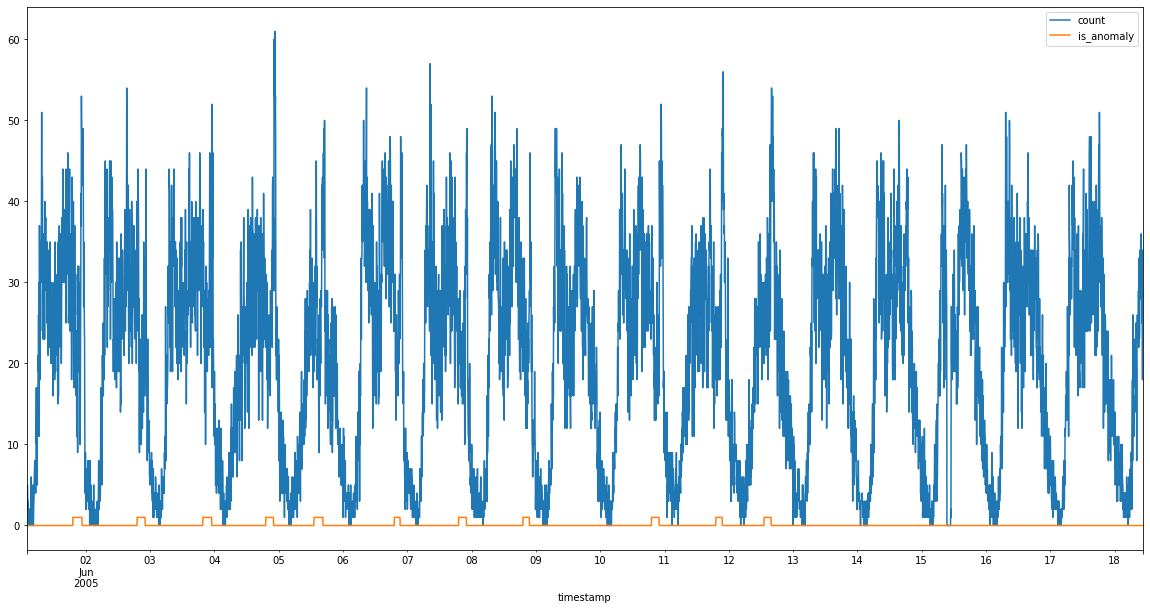

In [45]:
df.iloc[15000:20000].plot(x="timestamp", y=["count", "is_anomaly"])